# 군집화(Clustering) - K Means Algorithm

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

- Iris data

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)


pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

- K-means 모델 생성과 학습

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [6]:
# 비지도학습이므로 y값이 없다
kmeans.fit(iris_std)    # 스케일링한 데이터 X값만 제공

KMeans(n_clusters=3, random_state=2021)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
np.unique(kmeans.labels_, return_counts=True) # 0: 47개, 1: 50개, 2:53개

(array([0, 1, 2]), array([47, 50, 53], dtype=int64))

In [11]:
df = pd.DataFrame({
    'target':iris.target, 'PC1':iris_pca[:,0],
    'PC2':iris_pca[:,1], 'cluster':kmeans.labels_
})
df.head(3)

,target,PC1,PC2,cluster
0,0,-2.264703,0.480027,1
1,0,-2.080961,-0.674134,1
2,0,-2.364229,-0.341908,1


In [13]:
df.groupby(['target', 'cluster']).count()   # target: species값, cluster는 군집된 모양,\
                                            # target1과 target2의 cluster값이 나뉘는 것은 0에 가까운 것과, 2에 가까운 것으로 나뉘기 때문이다.

PC1  PC2
target cluster          
0      1         50   50
1      0         11   11
       2         39   39
2      0         36   36
       2         14   14

- 데이터 시각화

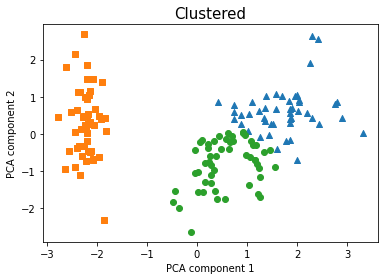

In [15]:
# 군집화된 결과를 차원축소하여 시각화
markers = ['^', 's', 'o']   

for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker)
                
plt.title('Clustered', fontsize=15) # y값이 없기 때문에, plt.legend()는 사용하지 않는다.
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

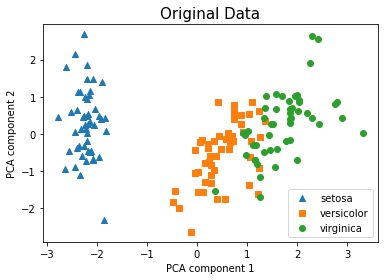

In [16]:
# 원본 iris 데이터 시각화
markers = ['^', 's', 'o']   # 점을 표시할 때 ^: 삼각형, s:네모, o:동그라미
                            # 0, 1, 2번째
                            # 0: setosa, 1:vergicolour, 2:virginica
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker,  # 앞의 marker는 positional argument, 뒤의 marker는 for문의 변수인 marker
                label=iris.target_names[i])
plt.legend()
plt.title('Original Data', fontsize=15)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

- 두 개의 그림 비교

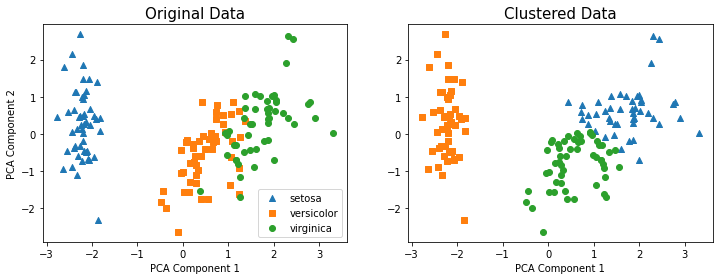

In [23]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# 하나의 그림으로 그리려면, 먼저 두 개의 그래프 중에서 어떤 것이 차이가 나는지 알아야 한다. 
# 조건 필터링 거는 부분이 다르다!

for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]     # row가 1이기 때문에, 인덱스가 하나만 필요하다.
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    
    if column == 'target':
        ax.legend()
        ax.set_title('Original Data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('Clustered Data', fontsize=15)

    ax.set_xlabel('PCA Component 1')
    

plt.show()

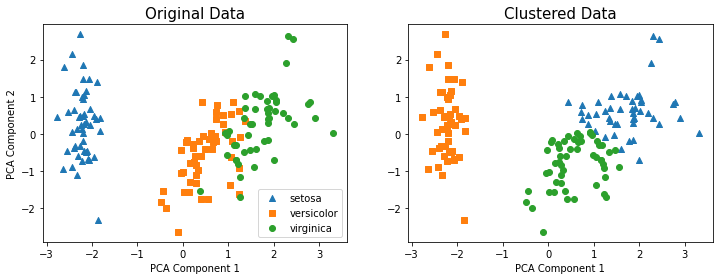

In [30]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1,2,k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

    if k == 0:
        plt.legend()
        plt.title('Original Data', fontsize=15)
        plt.ylabel('PCA Component 2')
    else:
        plt.title('Clustered Data', fontsize=15)

    plt.xlabel('PCA Component 1')
plt.show()